# Logistic Regression 
## Predicting Hospital Readmissions  
## Dataset Link : https://www.kaggle.com/datasets/dubradave/hospital-readmissions


#### The information in the given dataset is provided below 
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')

In [1]:
#Import the neccessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# read the dataset
data = pd.read_csv("hospital_readmissions.csv")
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [3]:
# get the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [4]:
#no of unique variables in each categorical  feature
data.select_dtypes(include="object").nunique()

age                  6
medical_specialty    7
diag_1               8
diag_2               8
diag_3               8
glucose_test         3
A1Ctest              3
change               2
diabetes_med         2
readmitted           2
dtype: int64

In [5]:
# checking for the null values
data.isnull().sum()

age                  0
time_in_hospital     0
n_lab_procedures     0
n_procedures         0
n_medications        0
n_outpatient         0
n_inpatient          0
n_emergency          0
medical_specialty    0
diag_1               0
diag_2               0
diag_3               0
glucose_test         0
A1Ctest              0
change               0
diabetes_med         0
readmitted           0
dtype: int64

- we didn't have any null values thats good to see
- still we have data missing in the categorical features which is itself defined as "missing" category

## Exploratory Data Analysis

In [6]:
#lets list the categorical and numerical columns
cat_columns=[i for i in data.select_dtypes(include='object').columns if i!="readmitted"]
num_columns=[i for i in data.select_dtypes(include='int64').columns]

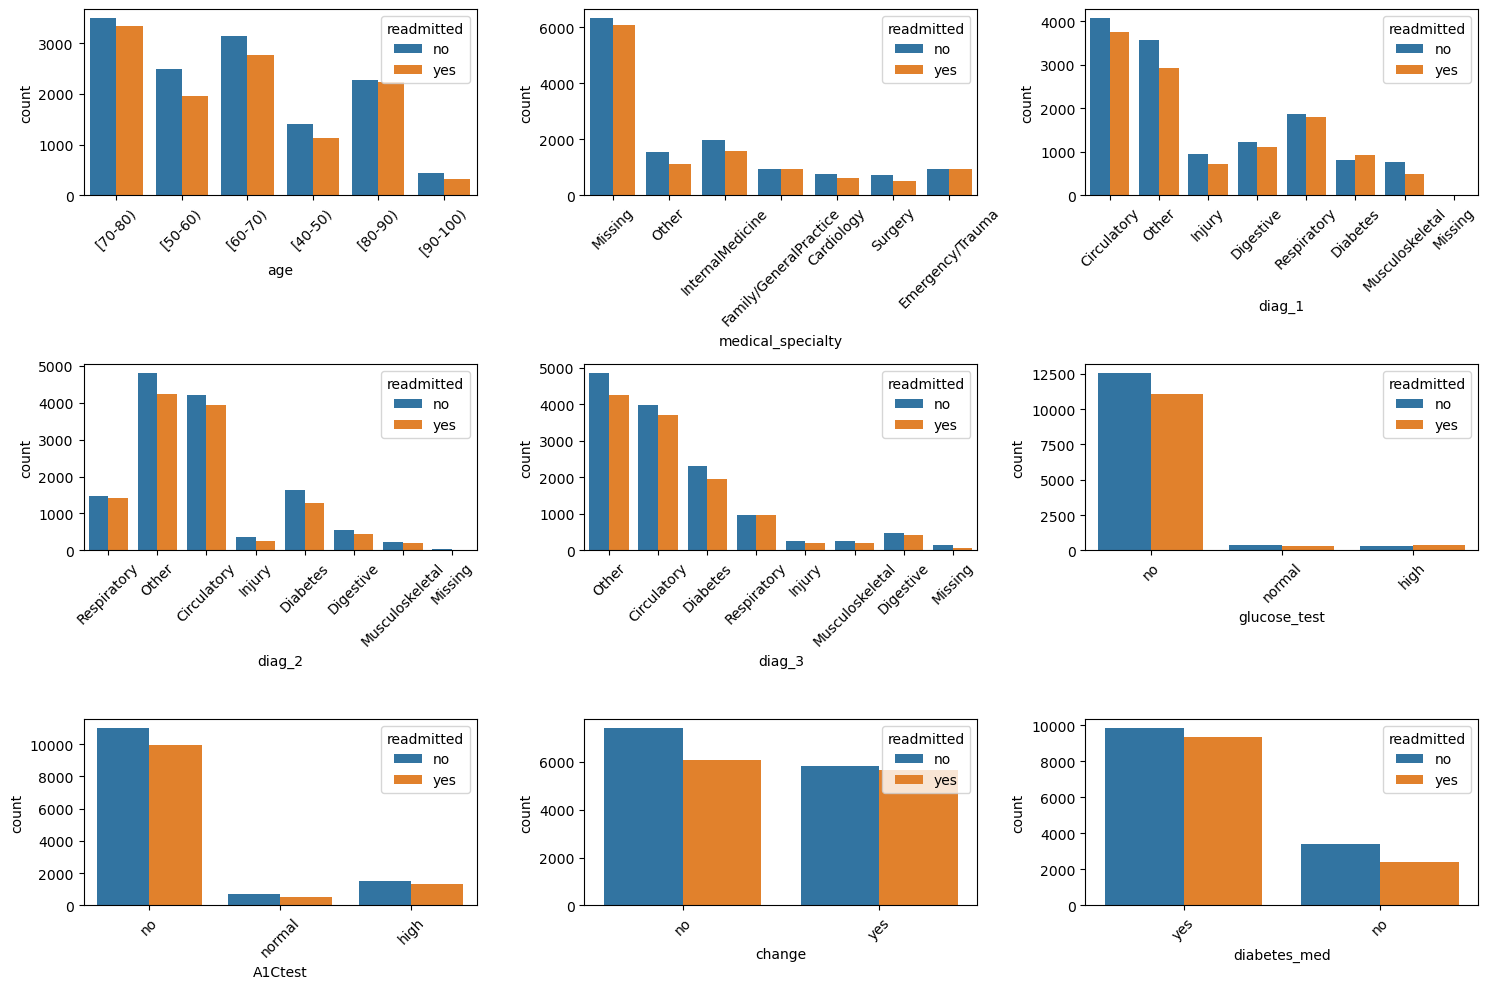

In [7]:
# plotting the categorical variables with respect to the target 

fig, axs= plt.subplots(3,3,figsize=(15,10))
axs=axs.ravel()

for i, var in enumerate(cat_columns):
    sns.countplot(data=data, x= var, hue="readmitted", ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=45)

plt.tight_layout()
plt.show()

- As we can seein medical_speciality there are quite huge no of missing values
- Diagnosis 1,2,3 doesnot contain much missing values
- when we observe the glucose and A1 tests are not performed to major no of patients

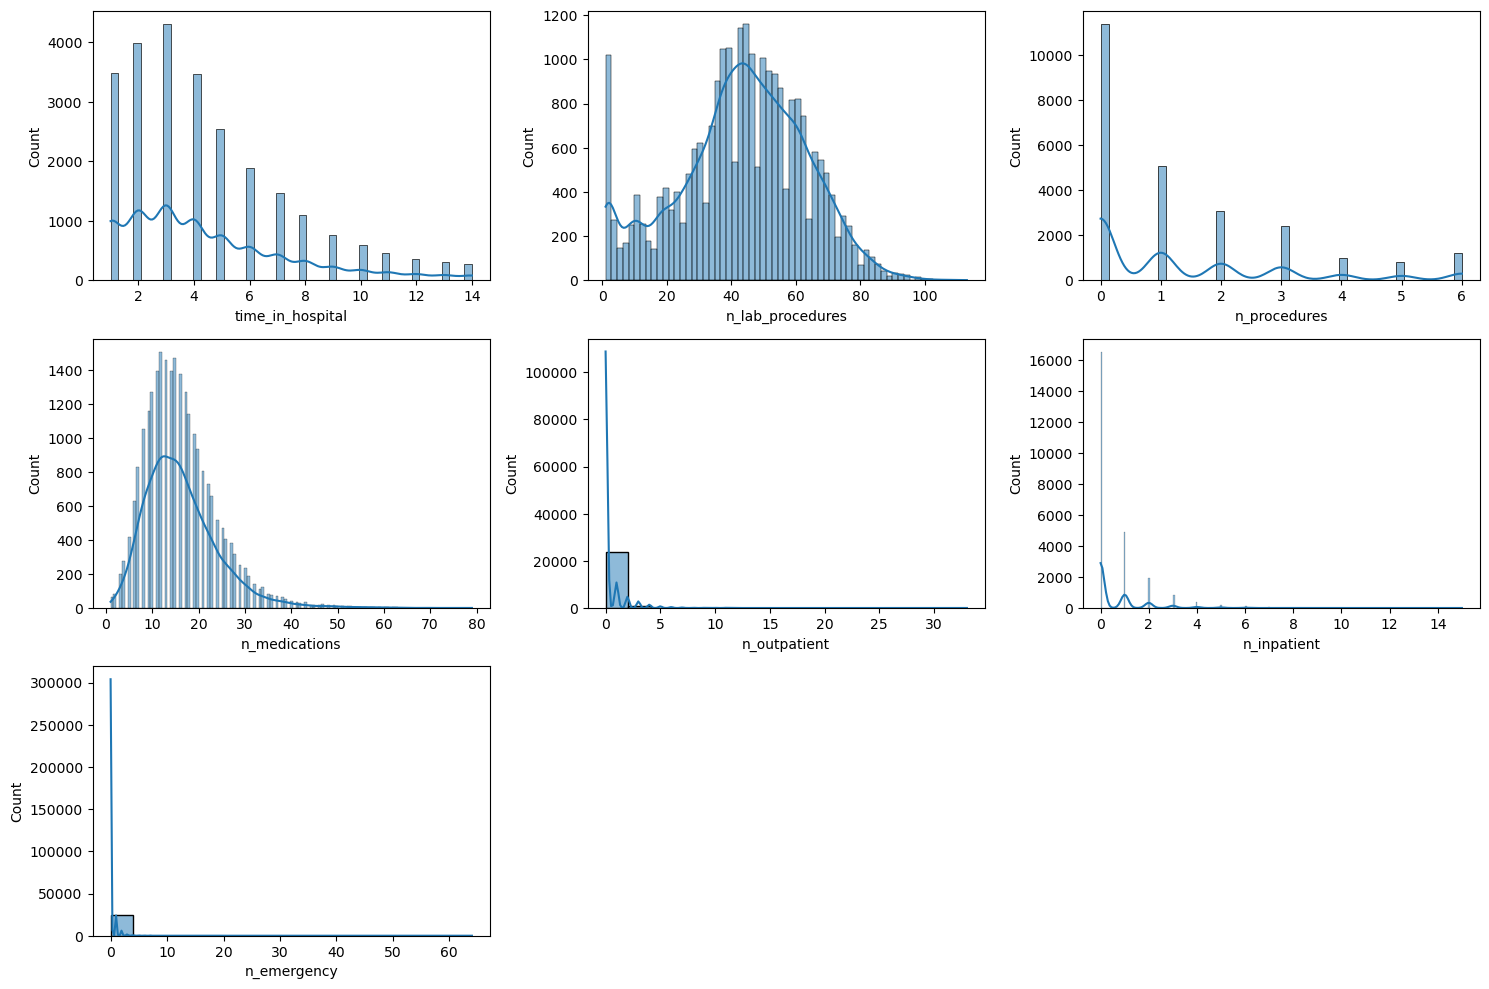

In [8]:
# lets look at the distribution of the numerical features in the data

fig, axs = plt.subplots(3, 3, figsize=(15, 10))
axs = axs.ravel()

for i, var in enumerate(num_columns):
    sns.histplot(data=data, x=var, ax=axs[i], kde=True)

fig.delaxes(axs[7])
fig.delaxes(axs[8])

plt.tight_layout()
plt.show()

- the data has outliers and the numerical features in the data is quite skewed
- unable to transform any of those features as outliers are significatnly more

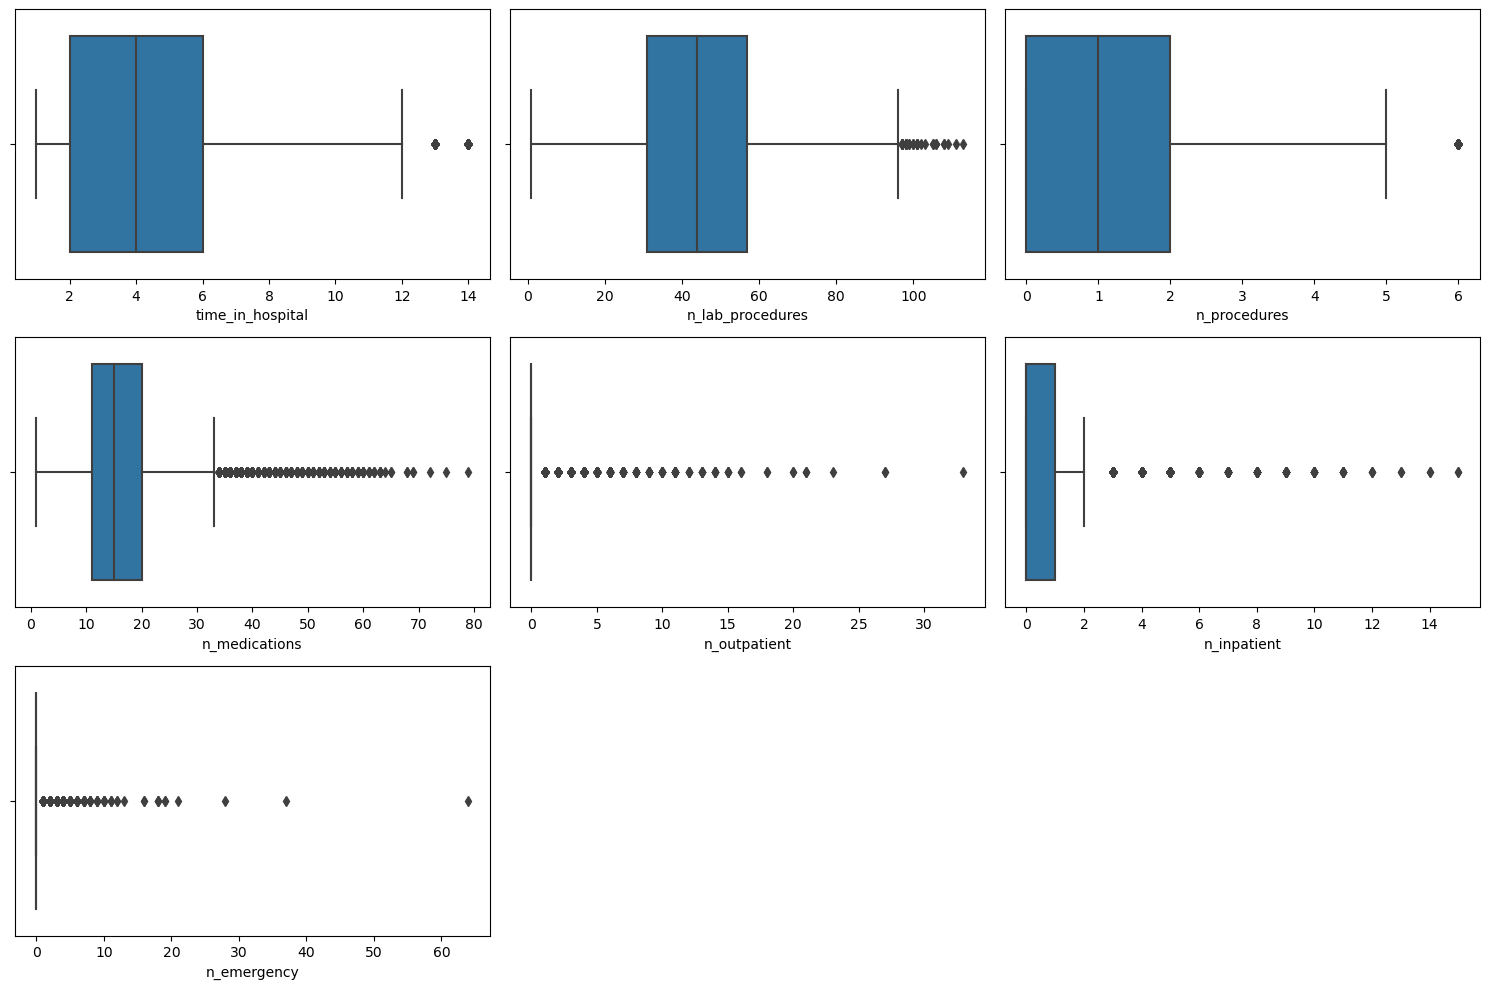

In [9]:
# Lets look at the outliers present in the numerical features

fig, axs= plt.subplots(3,3,figsize=(15,10))
axs=axs.ravel()

for i, var in enumerate(num_columns):
    sns.boxplot(data=data, x= var, ax=axs[i])

fig.delaxes(axs[7])
fig.delaxes(axs[8])

plt.tight_layout()
plt.show()

- That's lot of outliers are there in n_outpatient, n_inpatient, n_medications, n_emergency, n_lab_procedures features

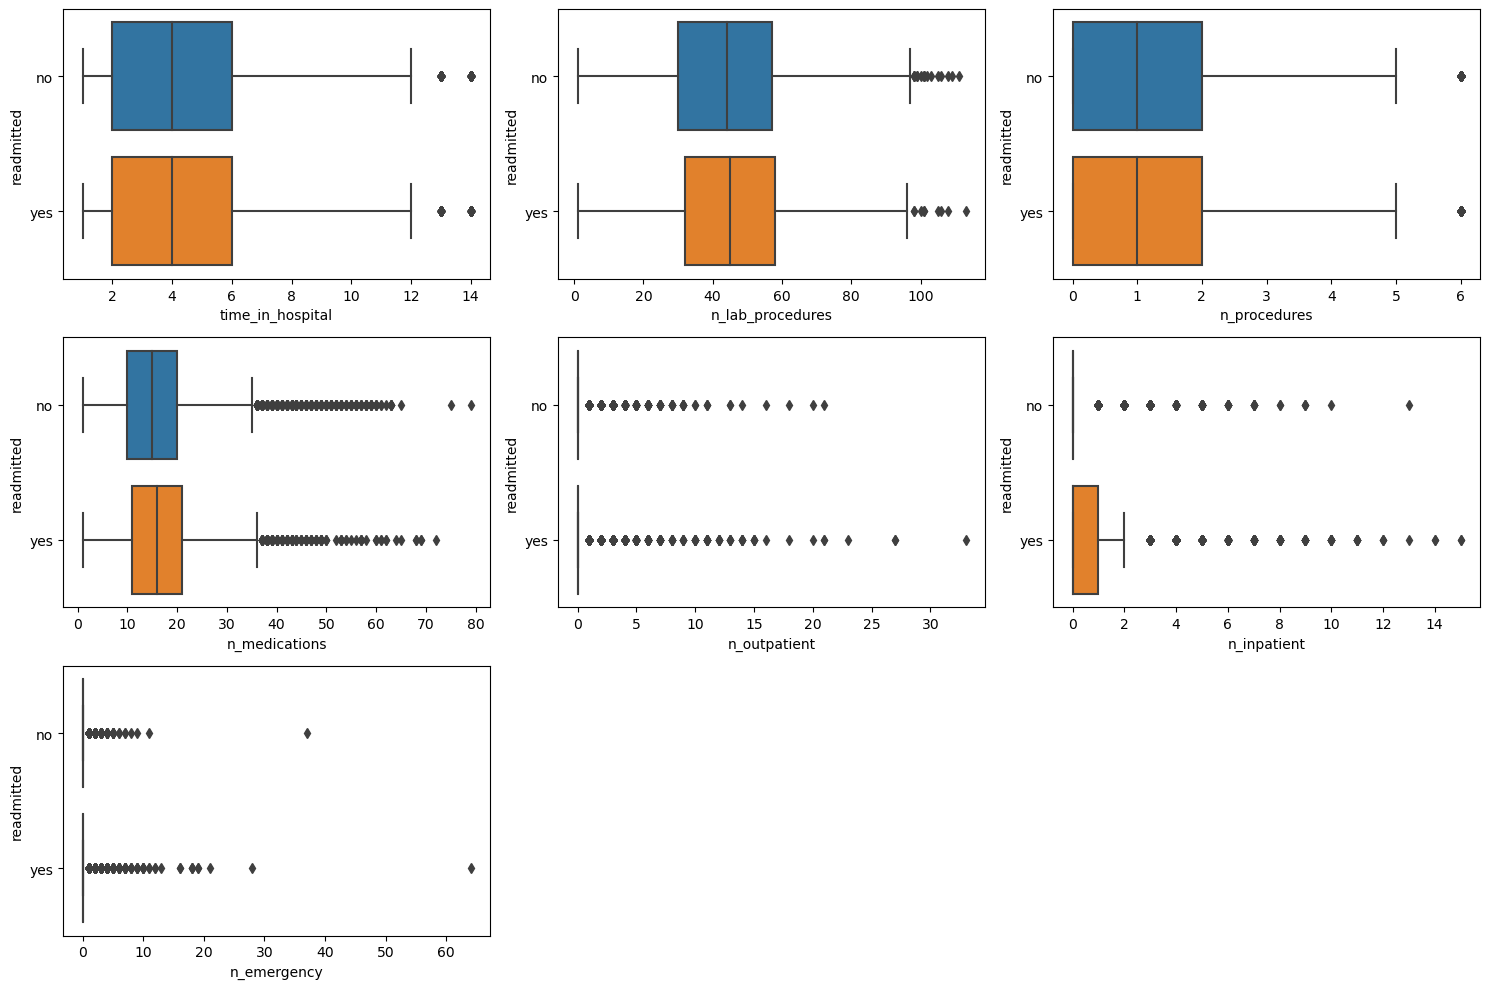

In [10]:
# Lets look at the outliers present in the numerical features

fig, axs= plt.subplots(3,3,figsize=(15,10))
axs=axs.ravel()

for i, var in enumerate(num_columns):
    sns.boxplot(data=data, x= var, y="readmitted", ax=axs[i])

fig.delaxes(axs[7])
fig.delaxes(axs[8])

plt.tight_layout()
plt.show()

- Outliers are quite significant in both of the target classes

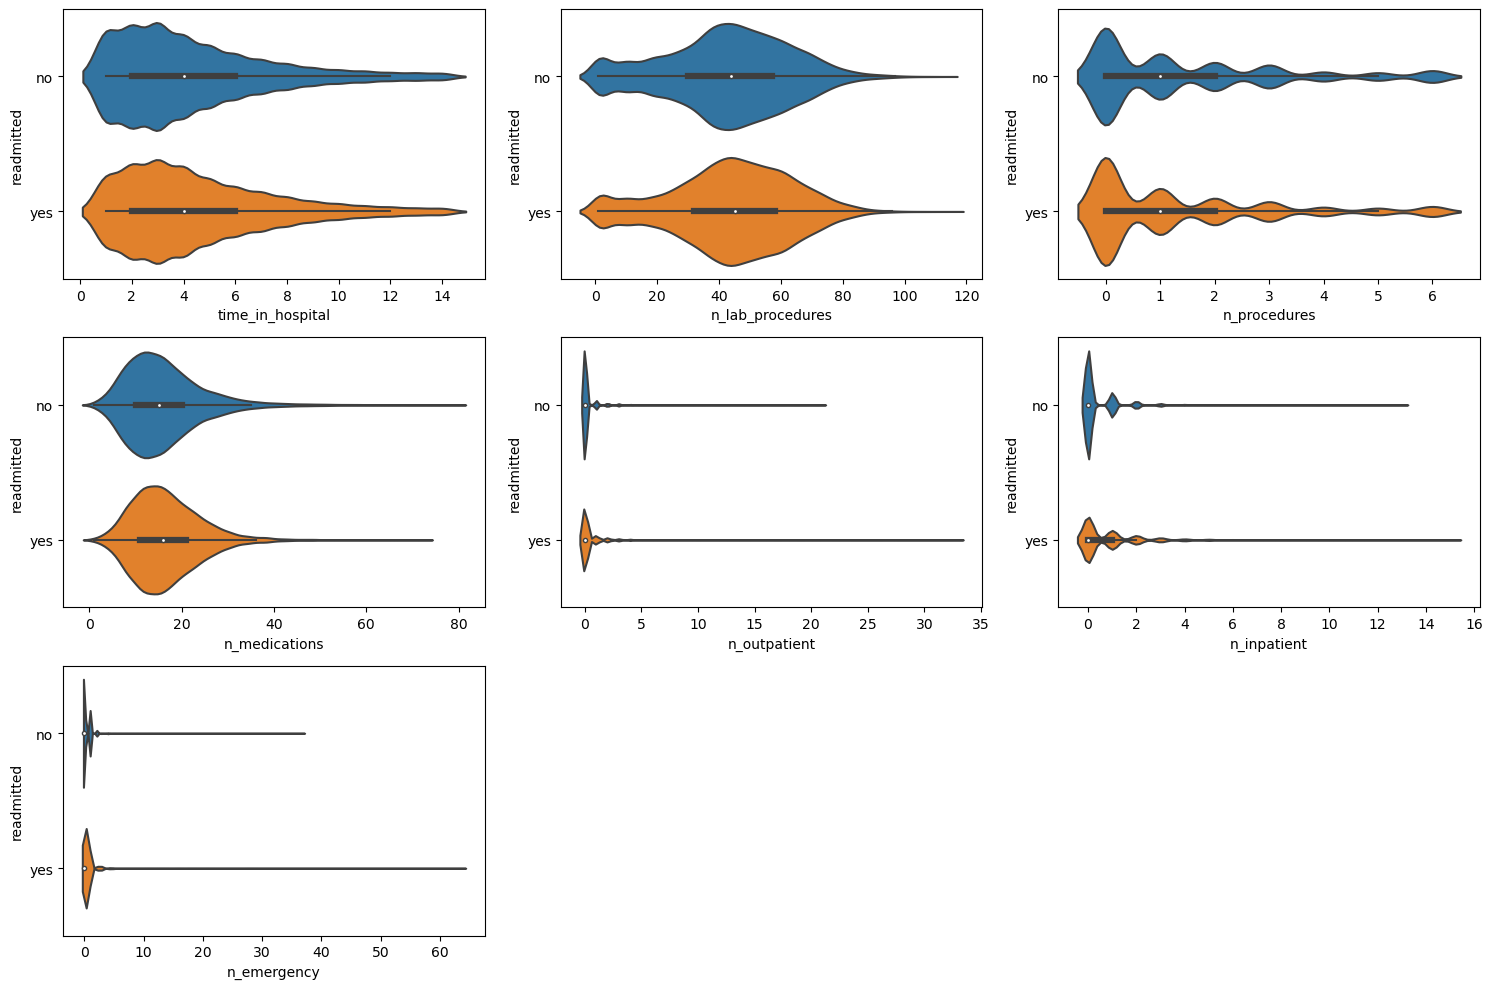

In [11]:
# lest look at some violin plots for numerical features

fig, axs= plt.subplots(3,3,figsize=(15,10))
axs=axs.ravel()

for i, var in enumerate(num_columns):
    sns.violinplot(data=data, x= var, y="readmitted", ax=axs[i])

fig.delaxes(axs[7])
fig.delaxes(axs[8])

plt.tight_layout()
plt.show()

- The visualisation provided the proper insights of the numerical and categorical featires of the data.
- The missing values in some of the categorical variables are bit more.
- We came across the outliers and the distribution of data in numerical features.

### Lets dive into Feature Transformation
- The age feature is in the format of intervals.
- Encoding the categorical variables will be done,
- As the categorical features has various no of classes lets prefer Label encoding to overcome dimensionality problems
- We will handle the outliers usinf IQR
- Also try to Standardise the numerical features

In [12]:
for col in cat_columns:
    print(col," : ", data[col].unique())

age  :  ['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
medical_specialty  :  ['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
diag_1  :  ['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
diag_2  :  ['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
diag_3  :  ['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
glucose_test  :  ['no' 'normal' 'high']
A1Ctest  :  ['no' 'normal' 'high']
change  :  ['no' 'yes']
diabetes_med  :  ['yes' 'no']


In [13]:
# encoding the categorical variable

from sklearn.preprocessing import LabelEncoder

for col in cat_columns:
    encoder=LabelEncoder()
    encoder.fit(data[col].unique())
    data[col]=encoder.transform(data[col])
    
    print(col, " : ",data[col].unique())

age  :  [3 1 2 0 4 5]
medical_specialty  :  [4 5 3 2 0 6 1]
diag_1  :  [0 6 3 2 7 1 5 4]
diag_2  :  [7 6 0 3 1 2 5 4]
diag_3  :  [6 0 1 7 3 5 2 4]
glucose_test  :  [1 2 0]
A1Ctest  :  [1 2 0]
change  :  [0 1]
diabetes_med  :  [1 0]


In [14]:
# lets have a look at the encoded data
data.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,8,72,1,18,2,0,0,4,0,7,6,1,1,0,1,no
1,3,3,34,2,13,0,0,0,5,6,6,6,1,1,0,1,no
2,1,5,45,0,18,0,0,0,4,0,0,0,1,1,1,1,yes
3,3,2,36,0,12,1,0,0,4,0,6,1,1,1,1,1,yes
4,2,1,42,0,7,0,0,0,3,6,0,7,1,1,0,1,no


In [15]:
# define a function to remove outliers using IQR

def outlier_handler(df, columns):
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))
    return df


outlier_columns=['n_outpatient', 'n_inpatient', 'n_medications', 'n_emergency', 'n_lab_procedures' ]

data_handled=outlier_handler(data,outlier_columns)

data_handled.shape

#data_handled=data.copy()
data_handled.shape

(25000, 17)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_dataframe = pd.DataFrame(scaler.fit_transform(data[num_columns]),columns=num_columns)

for col in num_columns:
    data_handled[col]=scaled_dataframe[col]

data_handled

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,1.181671,1.453011,-0.205440,0.277745,0.0,-0.637342,0.0,4,0,7,6,1,1,0,1,no
1,3,-0.484212,-0.466401,0.377601,-0.414734,0.0,-0.637342,0.0,5,6,6,6,1,1,0,1,no
2,1,0.182141,0.089218,-0.788481,0.277745,0.0,-0.637342,0.0,4,0,0,0,1,1,1,1,yes
3,3,-0.817389,-0.365379,-0.788481,-0.553230,0.0,-0.637342,0.0,4,0,6,1,1,1,1,1,yes
4,2,-1.150566,-0.062314,-0.788481,-1.245709,0.0,-0.637342,0.0,3,6,0,7,1,1,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,4,3.180732,1.705565,-0.205440,1.939695,0.0,-0.637342,0.0,4,0,6,0,1,2,0,0,yes
24996,4,-0.817389,1.149946,-0.788481,1.108720,0.0,-0.637342,0.0,4,2,3,6,1,0,1,1,yes
24997,3,0.182141,-1.577640,-0.788481,-1.384205,0.0,0.606106,0.0,4,6,6,6,2,1,0,0,yes
24998,3,-0.817389,0.897392,0.960642,-0.137742,0.0,-0.637342,0.0,2,7,1,6,1,1,1,1,no


<Axes: >

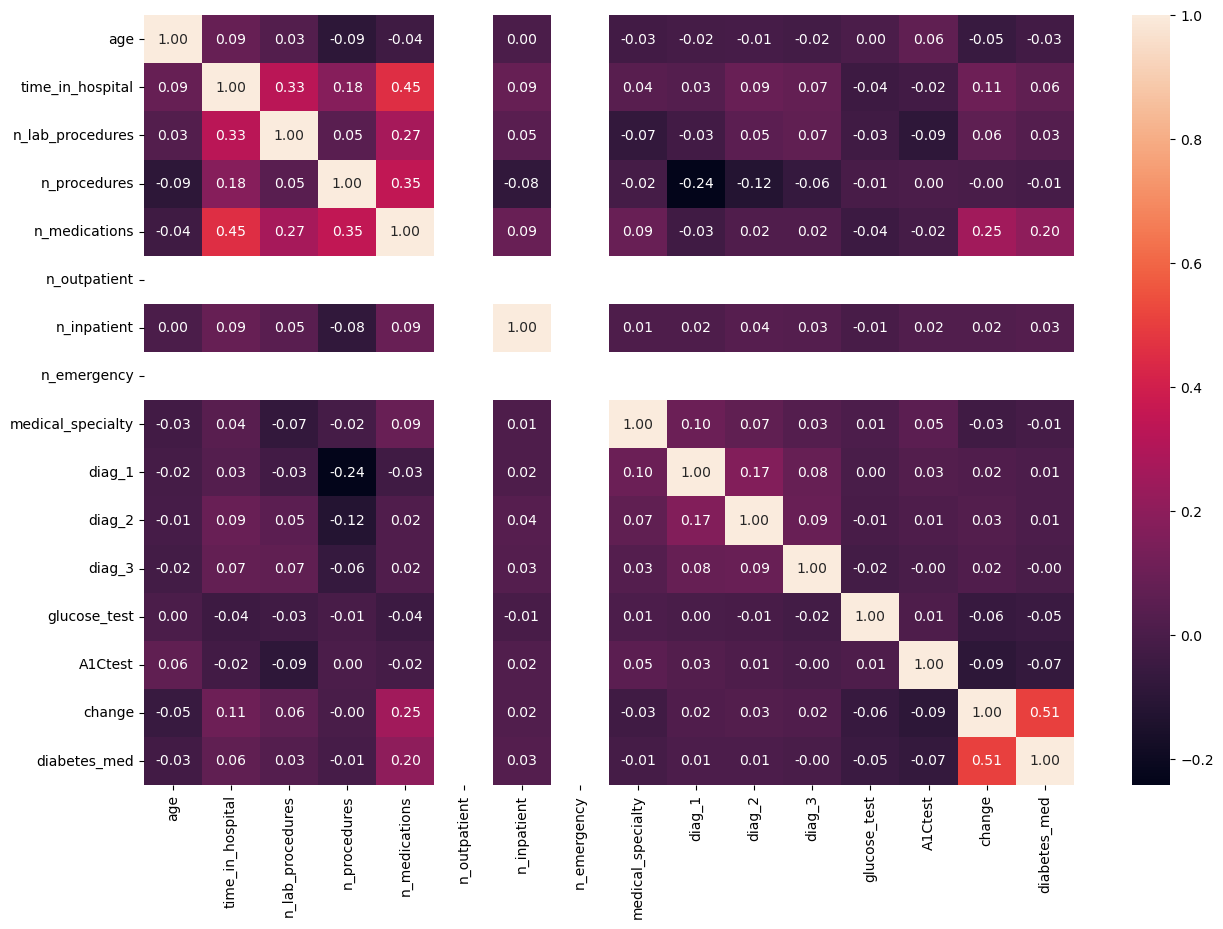

In [17]:
# lloking the correaltion matrix of the data
plt.figure(figsize=(15,10))
sns.heatmap(data=data_handled.corr(),annot=True, fmt='.2f')

- we can observe the blank space in n_outpatient and n_emergency columns this shows that there is no linear correlation between the other features and those faetures.
- It suggests that we donot have any impack on the output with these two columns, so we can remove them.

In [18]:
data_final=data_handled.drop(['n_outpatient','n_emergency'],axis=1)
data_final.shape
#data_final=data_handled.copy()

(25000, 15)

In [19]:
data_final['readmitted']=data_final['readmitted'].map({'no':0,'yes':1})

In [20]:
data_final.head(10)

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_inpatient,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,3,1.181671,1.453011,-0.205440,0.277745,-0.637342,4,0,7,6,1,1,0,1,0
1,3,-0.484212,-0.466401,0.377601,-0.414734,-0.637342,5,6,6,6,1,1,0,1,0
2,1,0.182141,0.089218,-0.788481,0.277745,-0.637342,4,0,0,0,1,1,1,1,1
3,3,-0.817389,-0.365379,-0.788481,-0.553230,-0.637342,4,0,6,1,1,1,1,1,1
4,2,-1.150566,-0.062314,-0.788481,-1.245709,-0.637342,3,6,0,7,1,1,0,1,0
5,0,-0.817389,0.392283,-0.788481,-0.830222,-0.637342,4,6,6,6,1,1,0,0,1
6,1,-0.151036,0.038707,0.377601,0.693233,-0.637342,4,3,6,6,1,2,1,1,0
7,2,-1.150566,-1.224064,2.709765,0.000753,-0.637342,5,0,6,6,1,1,0,1,1
8,4,-0.151036,1.200457,0.960642,-0.414734,-0.637342,3,2,6,6,1,1,0,0,1
9,3,1.181671,-0.314868,-0.205440,0.277745,-0.637342,2,7,7,6,1,1,1,1,0


- Hope we have a clean data , lets start the modelling.
### Model Building

In [21]:
# splitting the data into Independent and dependent features
X=data_final.drop(['readmitted'],axis=1)
y=data_final['readmitted']


In [22]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, log_loss


logreg = LogisticRegression()

# Define the hyperparameter grid to search
param_grid = {
    'C': np.logspace(-3, 3, 7),  # C values from 0.001 to 1000
    'penalty': ['l1', 'l2'], # Try both L1 and L2 regularization
    #'solver':['liblinear','sag','saga','lbfgs']
}

# Create the GridSearchCV with StratifiedKFold cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

# Fit the GridSearchCV to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and best cross-validation score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)

print("---------------------------------------------")
model=LogisticRegression(**grid_search.best_params_)
model.fit(X_train, y_train)

predictions=model.predict(X_test)

# print the scores of different metric
print("Accuracy: ",accuracy_score(y_test,predictions))
print("f1_score: ",f1_score(y_test,predictions))
print("Recall score : ",recall_score(y_test,predictions))
print("Precision score: ",precision_score(y_test,predictions))
print("roc_auc_score: ",roc_auc_score(y_test,predictions))
print("Logloss : ",log_loss(y_test,predictions))


Best Hyperparameters: {'C': 0.001, 'penalty': 'l2'}
Best Cross-validation Score: 0.60465
---------------------------------------------
Accuracy:  0.6046
f1_score:  0.49138152817082575
Recall score :  0.4077711357813834
Precision score:  0.6181229773462783
roc_auc_score:  0.5928998643541981
Logloss :  14.251660550056922


Text(50.722222222222214, 0.5, 'Actual')

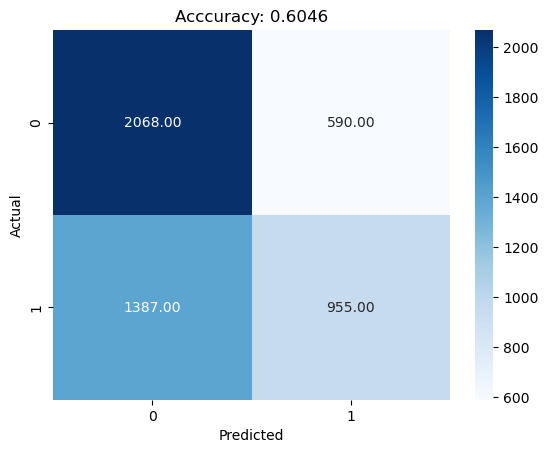

In [24]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,predictions)

sns.heatmap(data=cm,annot=True,fmt='.2f',cmap='Blues')
plt.title(f"Acccuracy: {accuracy_score(y_test,predictions)}")
plt.xlabel("Predicted")
plt.ylabel("Actual")

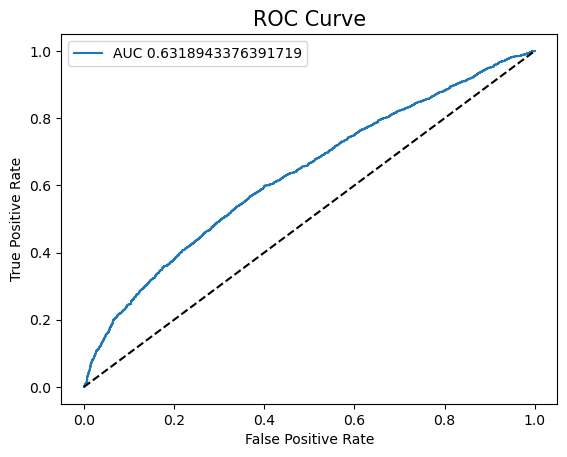

In [25]:
#Plotting the roc curve

from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label=f'AUC {auc}')
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

Text(0.5, 1.0, 'Feature Importances')

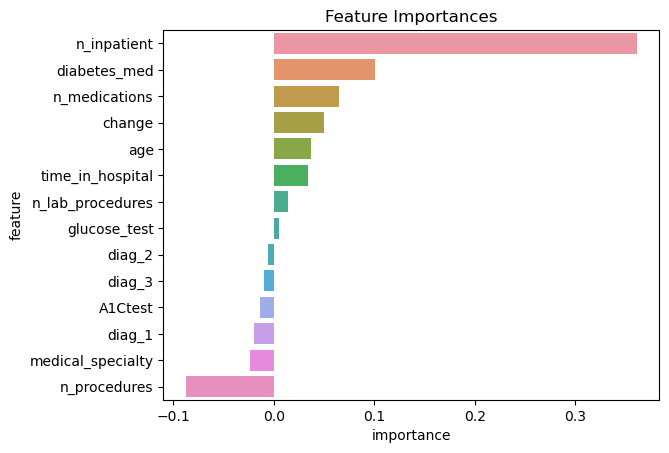

In [26]:
importances = model.coef_[0]

feat_imp_df = pd.DataFrame({'feature':X.columns, 'importance':importances}).sort_values(by='importance')[::-1]
sns.barplot(x="importance", y='feature', data=feat_imp_df)
plt.title("Feature Importances")

- Thus the feature importances shows the effect of features on predicitng the target.
- We got an accuracy score of 60.46% not good enough.
- Further the accuracy may or maynot be improved by applying tree based and ensemble models